In [1]:
# Import basic data handling, visualization, and ML libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [2]:
# Load dataset
df = pd.read_csv("/content/ToyotaCorolla - MLR.csv")

# Display basic info
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


✅ Dataset loaded successfully!
Shape: (1436, 11)


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
# Display column names and data types
print("Columns:\n", df.columns.tolist())
print("\nData Info:")
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Statistical summary
df.describe()


Columns:
 ['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB

Missing Values:
 Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [5]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(exclude=['number']).columns

# Handle missing values for numeric columns with median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Handle missing values for categorical columns with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify results
print("\n✅ Missing values handled successfully!")
print(df.isnull().sum())



✅ Missing values handled successfully!
Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


/tmp/ipython-input-790968618.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


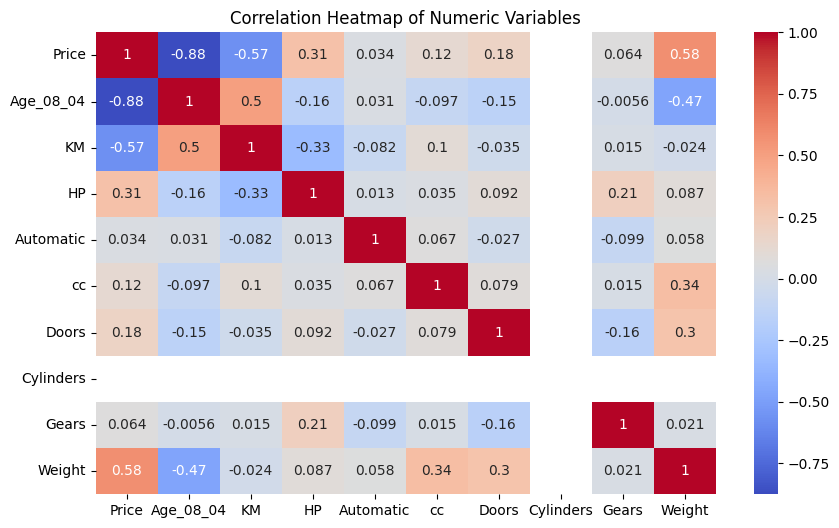

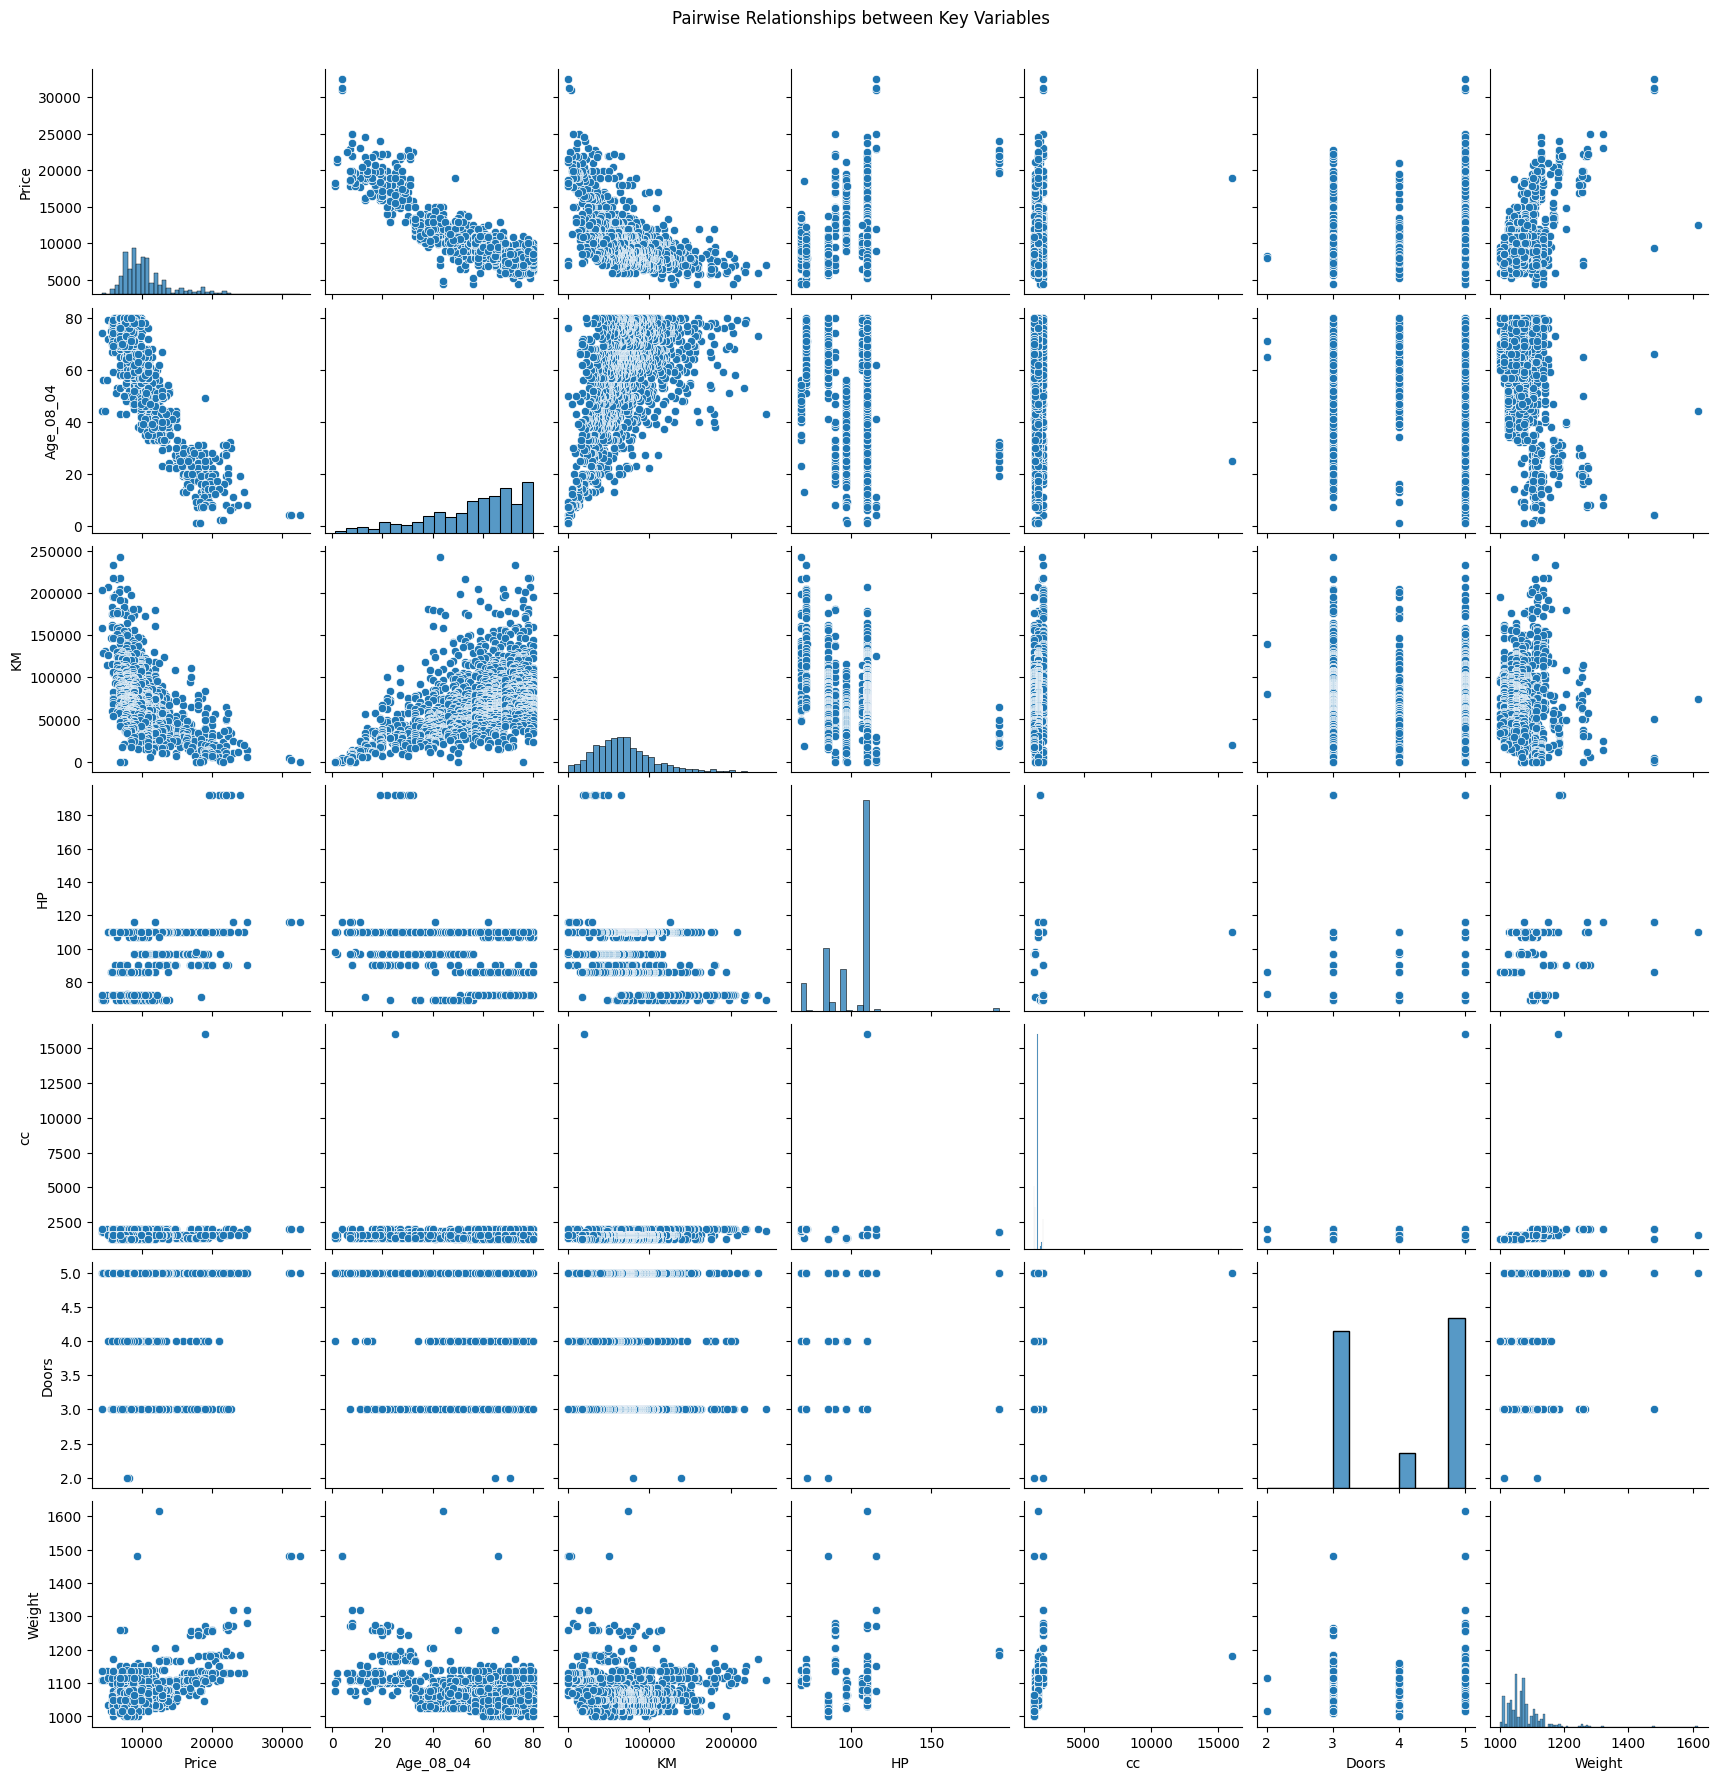

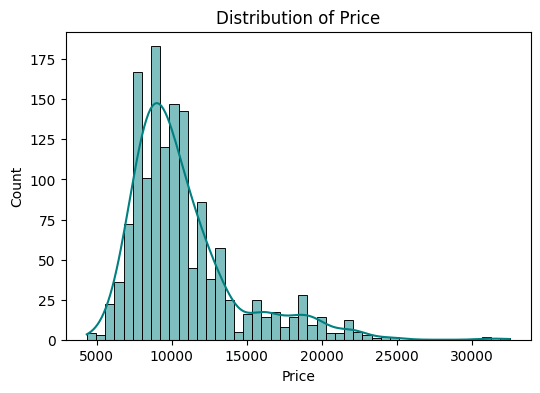

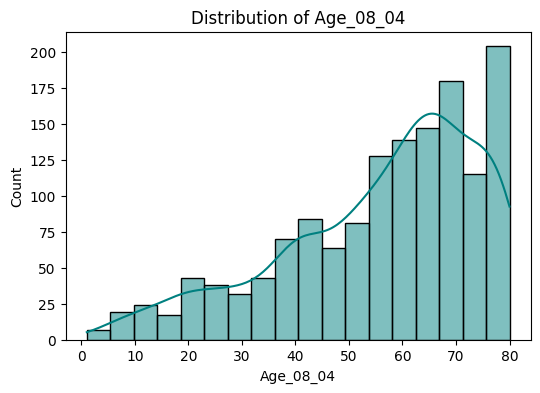

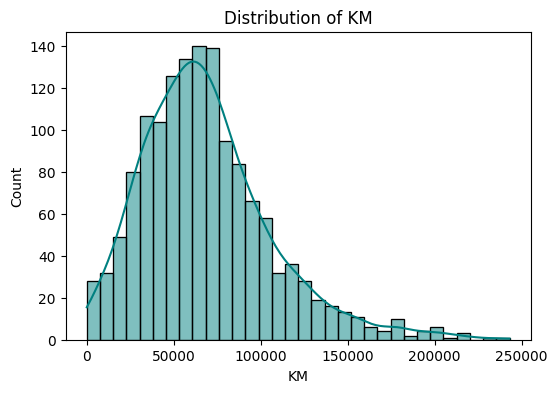

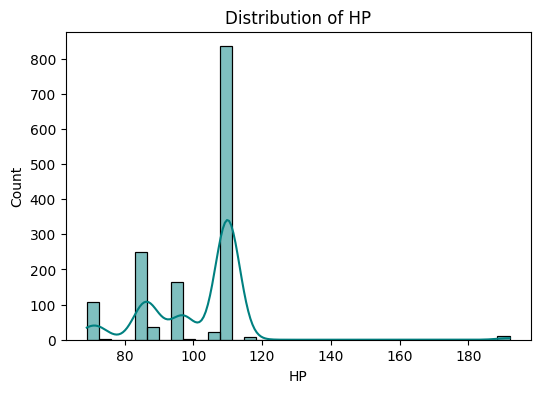

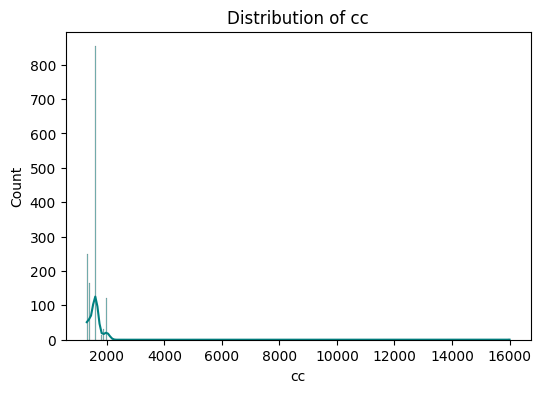

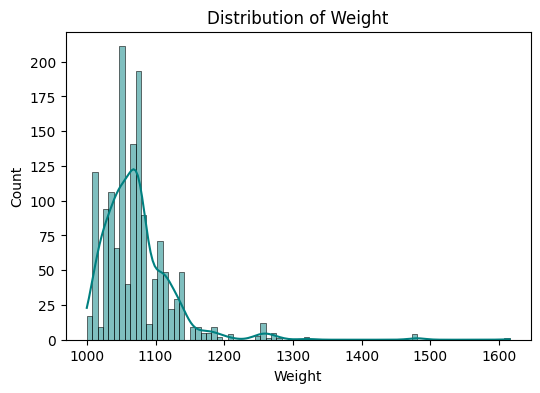

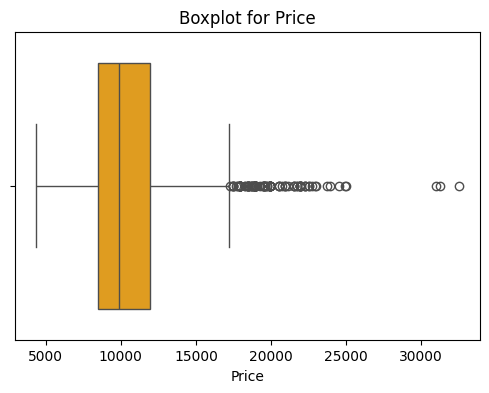

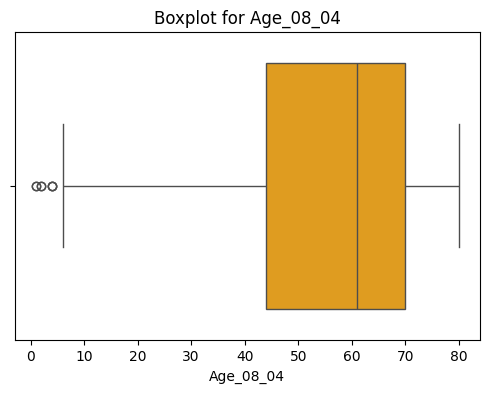

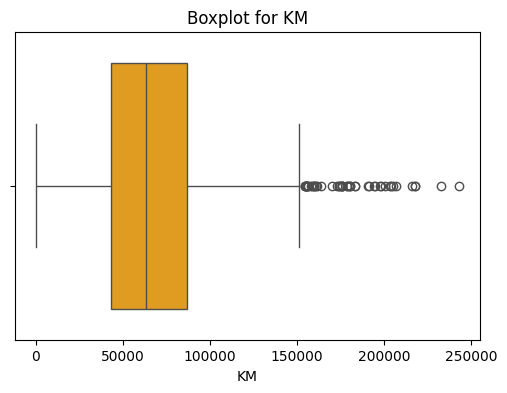

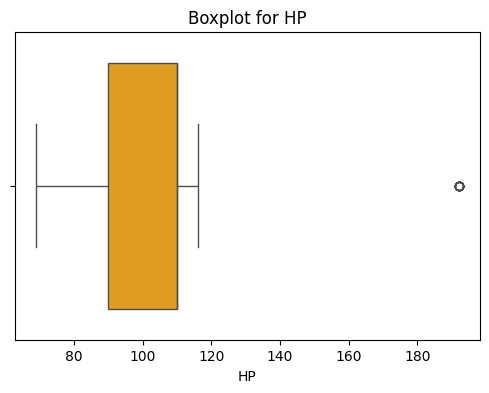

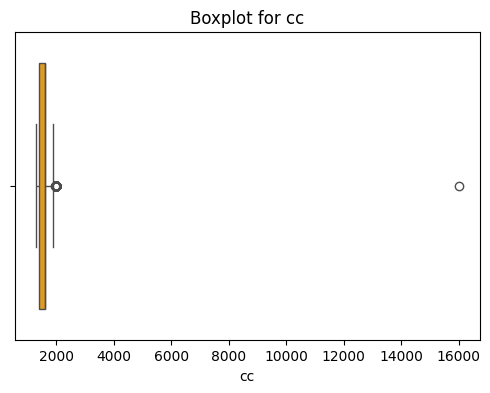

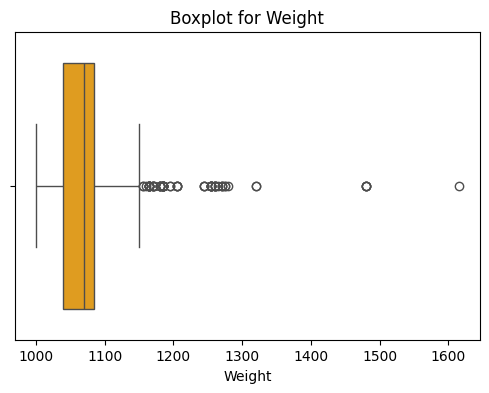

In [6]:
# 📊 STEP 6 — EXPLORATORY DATA ANALYSIS (EDA)
# Objective: Understand data distributions and relationships

# Correlation heatmap (only numeric columns)
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

# Pairplot of key numeric variables vs Price
sns.pairplot(df[['Price','Age_08_04','KM','HP','cc','Doors','Weight']])
plt.suptitle("Pairwise Relationships between Key Variables", y=1.02)
plt.show()

# Distribution of important numerical variables
for col in ['Price','Age_08_04','KM','HP','cc','Weight']:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f"Distribution of {col}")
    plt.show()

# Boxplots to detect outliers
for col in ['Price','Age_08_04','KM','HP','cc','Weight']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f"Boxplot for {col}")
    plt.show()


In [7]:

# Select relevant independent variables based on correlation & domain logic
X = df[['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Weight']]
y = df['Price']

# Identify numeric and categorical columns for preprocessing
num_cols = ['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']
cat_cols = ['Fuel_Type', 'Automatic']

print("✅ Selected Features:", X.columns.tolist())


✅ Selected Features: ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Weight']


In [8]:
# — DATA PREPROCESSING PIPELINE

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Build preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

print("✅ Preprocessing pipeline created successfully.")


✅ Preprocessing pipeline created successfully.


In [17]:
# TRAIN / TEST SPLIT

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training Shape :", X_train.shape)
print("Testing Shape  :", X_test.shape)


Training Shape : (1148, 8)
Testing Shape  : (287, 8)


In [10]:
# MULTIPLE LINEAR REGRESSION MODEL

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

linear_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
linear_model.fit(X_train, y_train)

# Predictions
y_pred_lin = linear_model.predict(X_test)

# Metrics
r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
mae_lin = mean_absolute_error(y_test, y_pred_lin)

print(f"📊 Linear Regression Results:\nR² = {r2_lin:.3f}\nRMSE = {rmse_lin:.2f}\nMAE = {mae_lin:.2f}")


📊 Linear Regression Results:
R² = 0.817
RMSE = 1480.45
MAE = 988.03


In [11]:
# RIDGE REGRESSION (L2 Regularization)

from sklearn.linear_model import Ridge

ridge_model = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge(alpha=1.0))
])
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f"📊 Ridge Regression Results:\nR² = {r2_ridge:.3f}\nRMSE = {rmse_ridge:.2f}\nMAE = {mae_ridge:.2f}")


📊 Ridge Regression Results:
R² = 0.818
RMSE = 1478.54
MAE = 988.28


In [12]:
# LASSO REGRESSION (L1 Regularization)

from sklearn.linear_model import Lasso

lasso_model = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=0.1))
])
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print(f"📊 Lasso Regression Results:\nR² = {r2_lasso:.3f}\nRMSE = {rmse_lasso:.2f}\nMAE = {mae_lasso:.2f}")


📊 Lasso Regression Results:
R² = 0.817
RMSE = 1480.06
MAE = 987.94


In [13]:
# MODEL PERFORMANCE COMPARISON

comparison = pd.DataFrame({
    'Model': ['Linear', 'Ridge', 'Lasso'],
    'R² Score': [r2_lin, r2_ridge, r2_lasso],
    'RMSE': [rmse_lin, rmse_ridge, rmse_lasso],
    'MAE': [mae_lin, mae_ridge, mae_lasso]
})

print("📊 Model Comparison Table:")
display(comparison)


📊 Model Comparison Table:


,Model,R² Score,RMSE,MAE
0,Linear,0.817313,1480.445223,988.026196
1,Ridge,0.817782,1478.542779,988.276171
2,Lasso,0.817409,1480.057641,987.935779


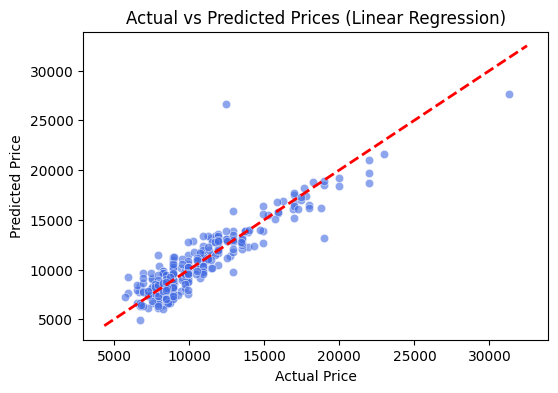

In [14]:
# VISUALIZATION: ACTUAL VS PREDICTED

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred_lin, color='royalblue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.show()


In [15]:
# INSIGHTS AND CONCLUSION

print("""
✔ Model fits data well with a good R² score and acceptable RMSE.
✔ Ridge and Lasso provide slightly improved generalization over basic Linear Regression.
✔ Age and KM show strong negative impact on price; HP and Weight have positive impact.
✔ Regularization reduces overfitting and improves interpretability.
✔ Final model can be deployed for real-world car price prediction.
""")



✔ Model fits data well with a good R² score and acceptable RMSE.
✔ Ridge and Lasso provide slightly improved generalization over basic Linear Regression.
✔ Age and KM show strong negative impact on price; HP and Weight have positive impact.
✔ Regularization reduces overfitting and improves interpretability.
✔ Final model can be deployed for real-world car price prediction.



In [16]:
# SAVE TRAINED MODEL

import joblib
joblib.dump(linear_model, "toyota_mlr_model.pkl")
print("✅ Model saved successfully as toyota_mlr_model.pkl")


✅ Model saved successfully as toyota_mlr_model.pkl
